# PROJET PYTHON - REPLIQUER UNE STRATEGIE LONG/SHORT MOMEMTUM/VALUE SUR DES ACTIONS EUROPEENNES

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Etape 1 - Notation des actions

In [322]:
#Importation des données returns
data_action_returns = pd.read_excel("DATA.xlsx", sheet_name = "RETURNS", index_col =0) 
data_action_returns = data_action_returns.rename_axis("DATE")
data_action_returns.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,0.110458,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,0.027679,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,0.008198,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,0.027944,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,-0.076527,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [323]:
#Importation des données Price to Book Ratio
data_action_PBR = pd.read_excel("DATA.xlsx", sheet_name = "PRICE TO BOOK", index_col=0)
data_action_PBR = data_action_PBR.rename_axis("DATE")
data_action_PBR.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-31,1.9489,2.6765,3.0258,2.9867,1.9480,1.3132,4.7849,1.9532,2.3268,3.1241,...,1.8357,2.1196,1.7517,8.2054,2.0402,1.9976,4.7757,3.7503,0.4728,0.5308
2006-02-28,2.1140,2.6849,3.2546,3.1099,1.9693,1.3615,5.2520,1.9577,2.2661,3.4432,...,1.9757,2.1611,1.8602,9.0273,2.1152,2.2800,4.7194,4.1308,0.4606,0.5792
2006-03-31,2.0716,2.8921,3.1018,3.0437,1.8784,1.3898,4.9293,1.9094,2.2279,3.5385,...,1.9411,2.0451,1.9246,9.1639,2.1698,2.2734,4.8622,3.7575,0.4547,0.7062
2006-04-28,2.1043,2.1745,2.9895,3.1576,1.9171,1.3497,4.5361,1.8654,2.0064,4.7312,...,1.9012,2.2485,1.8614,9.4695,2.1780,2.3622,5.3410,3.7332,0.5064,0.7204
2006-05-31,2.2616,2.1946,3.0657,3.1521,1.7247,1.2999,4.5226,1.9594,2.2219,4.8109,...,1.8494,2.1411,1.8985,9.1622,2.1780,2.3794,5.2379,3.9107,0.5171,0.6999


In [325]:
#Cleaning de data_action_returns
nan_count = data_action_returns.isnull().sum()
print(f"Nombre de NaN dans le tableau data_action_returns : \n{nan_count}")

if nan_count.sum() == 0 :
    print("Aucune valeur manquante !")

Nombre de NaN dans le tableau data_action_returns : 
ANHEUSER-BUSCH INBEV SA/NV      0
KONINKLIJKE AHOLD DELHAIZE N    0
ADIDAS AG                       0
AIR LIQUIDE SA                  0
AIRBUS SE                       0
ALLIANZ SE-REG                  0
ASML HOLDING NV                 0
BASF SE                         0
BAYER AG-REG                    0
BANCO BILBAO VIZCAYA ARGENTA    0
BAYERISCHE MOTOREN WERKE AG     0
DANONE                          0
BNP PARIBAS                     0
CRH PLC                         0
AXA SA                          0
DEUTSCHE BOERSE AG              0
VINCI SA                        0
DEUTSCHE POST AG-REG            0
DEUTSCHE TELEKOM AG-REG         0
ESSILORLUXOTTICA                0
ENEL SPA                        0
ENGIE                           0
ENI SPA                         0
FRESENIUS SE & CO KGAA          0
SOCIETE GENERALE SA             0
IBERDROLA SA                    0
ING GROEP NV                    0
INTESA SANPAOLO              

In [326]:
# Cleaning de data_action_PBR
nan_count = data_action_PBR.isnull().sum()
print(f"Nombre de NaN dans le tableau data_action_PBR : \n{nan_count}")

colonne_nan = data_action_PBR.columns[data_action_PBR.isnull().any()]
print(f"Colonnes avec NaN : \n{colonne_nan}")

for colonne in colonne_nan:
    data_action_PBR[colonne] = data_action_PBR[colonne].fillna(data_action_PBR[colonne].mean())

print(f"Nombre de NaN après remplacement : {data_action_PBR.isnull().sum().sum()}")


Nombre de NaN dans le tableau data_action_PBR : 
ANHEUSER-BUSCH INBEV SA/NV       0
KONINKLIJKE AHOLD DELHAIZE N     0
ADIDAS AG                        0
AIR LIQUIDE SA                   0
AIRBUS SE                        0
ALLIANZ SE-REG                   0
ASML HOLDING NV                  0
BASF SE                          0
BAYER AG-REG                     0
BANCO BILBAO VIZCAYA ARGENTA     0
BAYERISCHE MOTOREN WERKE AG      0
DANONE                           0
BNP PARIBAS                     24
CRH PLC                          0
AXA SA                           0
DEUTSCHE BOERSE AG               0
VINCI SA                         0
DEUTSCHE POST AG-REG             0
DEUTSCHE TELEKOM AG-REG          0
ESSILORLUXOTTICA                 0
ENEL SPA                         0
ENGIE                            0
ENI SPA                          0
FRESENIUS SE & CO KGAA           0
SOCIETE GENERALE SA             18
IBERDROLA SA                     0
ING GROEP NV                     0
INTESA

### Partie 1 - Notation des actions

##### Chaque action se voit attribuer un score momentum, calculé comme l'écart-type centré du rendement moyen mensuel sur les 12 derniers mois à l'exclusion du dernier (pour tenir compte des reversions à court terme). 
##### Chaque action se voit attribuer un score valeur, calculé comme l'écart-type centré de l'inverse du ratio cours/valeur comptable mesuré à la fin du mois précédent.
##### Le score global de chaque action est calculé comme la moyenne arithmétique des scores momentum et valeur.

#### Score Momentum

In [333]:
douze_derniers_mois_returns = data_action_returns.iloc[-13:-1,:]
rendement_moyen = douze_derniers_mois_returns.mean()
score_momentum = (rendement_moyen - rendement_moyen.mean()) / rendement_moyen.std()
print(f"Le score momentum des returns est  : \n{score_momentum}")

Le score momentum des returns est  : 
ANHEUSER-BUSCH INBEV SA/NV     -0.306898
KONINKLIJKE AHOLD DELHAIZE N    0.135098
ADIDAS AG                      -2.242507
AIR LIQUIDE SA                  0.221866
AIRBUS SE                       0.160263
ALLIANZ SE-REG                  0.270892
ASML HOLDING NV                -0.179034
BASF SE                        -1.025293
BAYER AG-REG                    0.424536
BANCO BILBAO VIZCAYA ARGENTA    1.805666
BAYERISCHE MOTOREN WERKE AG     0.646605
DANONE                         -0.449664
BNP PARIBAS                     1.264022
CRH PLC                         0.287028
AXA SA                          0.981875
DEUTSCHE BOERSE AG             -0.046143
VINCI SA                        0.411254
DEUTSCHE POST AG-REG           -0.779597
DEUTSCHE TELEKOM AG-REG         1.203286
ESSILORLUXOTTICA               -0.152503
ENEL SPA                       -1.207604
ENGIE                          -0.153304
ENI SPA                        -0.128378
FRESENIUS SE & CO K

#### Score Valeur

In [374]:
dernier_mois_PBR = data_action_PBR.iloc[205,:]
score_valeur = (dernier_mois_PBR - dernier_mois_PBR.mean())/dernier_mois_PBR.std()
print(f"Le score valeur est \n{score_valeur}")

Le score valeur est 
ANHEUSER-BUSCH INBEV SA/NV     -0.301603
KONINKLIJKE AHOLD DELHAIZE N   -0.265464
ADIDAS AG                       0.801708
AIR LIQUIDE SA                  0.180190
AIRBUS SE                       1.318553
ALLIANZ SE-REG                 -0.273676
ASML HOLDING NV                 5.570848
BASF SE                        -0.432663
BAYER AG-REG                   -0.353955
BANCO BILBAO VIZCAYA ARGENTA   -0.539842
BAYERISCHE MOTOREN WERKE AG    -0.576344
DANONE                         -0.247923
BNP PARIBAS                    -0.577008
CRH PLC                        -0.305648
AXA SA                         -0.278506
DEUTSCHE BOERSE AG              0.285497
VINCI SA                       -0.110130
DEUTSCHE POST AG-REG           -0.156020
DEUTSCHE TELEKOM AG-REG        -0.157741
ESSILORLUXOTTICA               -0.184098
ENEL SPA                       -0.212991
ENGIE                          -0.512187
ENI SPA                        -0.529275
FRESENIUS SE & CO KGAA         -0.56

#### Score total

In [377]:
score_global = (score_valeur + score_momentum) / 2
print(f"Le score global des actions est \n{score_global}")

Le score global des actions est 
ANHEUSER-BUSCH INBEV SA/NV     -0.304251
KONINKLIJKE AHOLD DELHAIZE N   -0.065183
ADIDAS AG                      -0.720399
AIR LIQUIDE SA                  0.201028
AIRBUS SE                       0.739408
ALLIANZ SE-REG                 -0.001392
ASML HOLDING NV                 2.695907
BASF SE                        -0.728978
BAYER AG-REG                    0.035291
BANCO BILBAO VIZCAYA ARGENTA    0.632912
BAYERISCHE MOTOREN WERKE AG     0.035131
DANONE                         -0.348793
BNP PARIBAS                     0.343507
CRH PLC                        -0.009310
AXA SA                          0.351684
DEUTSCHE BOERSE AG              0.119677
VINCI SA                        0.150562
DEUTSCHE POST AG-REG           -0.467809
DEUTSCHE TELEKOM AG-REG         0.522772
ESSILORLUXOTTICA               -0.168301
ENEL SPA                       -0.710298
ENGIE                          -0.332745
ENI SPA                        -0.328827
FRESENIUS SE & CO KGAA  

### Partie 2 - Sélection des portefeuilles

##### Le portefeuille long est composé des 15 actions avec les scores globaux les plus élevés. 
##### Le portefeuille short est composé des 15 actions avec les scores globaux les plus bas.

#### Tri des scores globaux

In [382]:
#Tri par ordre décroissant
score_global_tri = score_global.sort_values()
print(score_global_tri)

KONINKLIJKE PHILIPS NV         -2.086550
FRESENIUS SE & CO KGAA         -0.932912
VIVENDI SE                     -0.895521
VOLKSWAGEN AG-PREF             -0.857904
BASF SE                        -0.728978
ADIDAS AG                      -0.720399
ENEL SPA                       -0.710298
NOKIA OYJ                      -0.700314
TELEFONICA SA                  -0.520155
DEUTSCHE POST AG-REG           -0.467809
SANOFI                         -0.447486
DANONE                         -0.348793
ORANGE                         -0.338891
ENGIE                          -0.332745
ENI SPA                        -0.328827
ANHEUSER-BUSCH INBEV SA/NV     -0.304251
SOCIETE GENERALE SA            -0.173349
ESSILORLUXOTTICA               -0.168301
MERCEDES-BENZ GROUP AG         -0.155628
IBERDROLA SA                   -0.115025
KONINKLIJKE AHOLD DELHAIZE N   -0.065183
KERING                         -0.036024
CRH PLC                        -0.009310
ALLIANZ SE-REG                 -0.001392
BAYERISCHE MOTOR

#### Portefeuille court

In [385]:
portefeuille_court = score_global_tri.iloc[0:15]
print(portefeuille_court)

KONINKLIJKE PHILIPS NV   -2.086550
FRESENIUS SE & CO KGAA   -0.932912
VIVENDI SE               -0.895521
VOLKSWAGEN AG-PREF       -0.857904
BASF SE                  -0.728978
ADIDAS AG                -0.720399
ENEL SPA                 -0.710298
NOKIA OYJ                -0.700314
TELEFONICA SA            -0.520155
DEUTSCHE POST AG-REG     -0.467809
SANOFI                   -0.447486
DANONE                   -0.348793
ORANGE                   -0.338891
ENGIE                    -0.332745
ENI SPA                  -0.328827
dtype: float64


#### Portefeuille long

In [388]:
portefeuille_long = score_global_tri.iloc[-15:]
print(portefeuille_long)

SCHNEIDER ELECTRIC SE           0.240827
SIEMENS AG-REG                  0.294662
BNP PARIBAS                     0.343507
AXA SA                          0.351684
TOTALENERGIES SE                0.453051
ING GROEP NV                    0.491031
DEUTSCHE TELEKOM AG-REG         0.522772
MUENCHENER RUECKVER AG-REG      0.543484
BANCO BILBAO VIZCAYA ARGENTA    0.632912
SAFRAN SA                       0.651490
L'OREAL                         0.674764
AIRBUS SE                       0.739408
INDUSTRIA DE DISENO TEXTIL      0.895403
LVMH MOET HENNESSY LOUIS VUI    1.039382
ASML HOLDING NV                 2.695907
dtype: float64


### Etape 3 - Construction du portefeuille

##### Dans les portefeuilles long et short, les actions sont pondérées de manière proportionnelle aux valeurs absolues de leurs scores globaux. 
##### La stratégie investit 100% dans les portefeuilles longs et short respectivement. 

#### Calcul des performances mensuelles pour chaque portefeuille

In [393]:
rendement_long = data_action_returns[portefeuille_long.index].mean(axis = 1)
rendement_short = data_action_returns[portefeuille_court.index].mean(axis = 1)

performance_strategie = rendement_long - rendement_short

print(performance_strategie)

DATE
2006-01-31    0.005799
2006-02-28    0.000532
2006-03-31   -0.011470
2006-04-28    0.000101
2006-05-31   -0.033920
                ...   
2022-11-30    0.026600
2022-12-30   -0.002649
2023-01-31    0.055078
2023-02-28    0.018976
2023-03-31   -0.049311
Length: 207, dtype: float64


#### Calcul des pondérations

In [396]:
poids_long = score_global[portefeuille_long.index] / score_global[portefeuille_long.index].sum()
poids_short = score_global[portefeuille_court.index] / score_global[portefeuille_court.index].sum()

print(f"Les poids du portefeuille long sont : \n{poids_long}")
print(f"\nLes poids du portefeuille short sont : \n{poids_short}")

Les poids du portefeuille long sont : 
SCHNEIDER ELECTRIC SE           0.022783
SIEMENS AG-REG                  0.027876
BNP PARIBAS                     0.032497
AXA SA                          0.033271
TOTALENERGIES SE                0.042861
ING GROEP NV                    0.046454
DEUTSCHE TELEKOM AG-REG         0.049457
MUENCHENER RUECKVER AG-REG      0.051416
BANCO BILBAO VIZCAYA ARGENTA    0.059877
SAFRAN SA                       0.061634
L'OREAL                         0.063836
AIRBUS SE                       0.069952
INDUSTRIA DE DISENO TEXTIL      0.084709
LVMH MOET HENNESSY LOUIS VUI    0.098331
ASML HOLDING NV                 0.255046
dtype: float64

Les poids du portefeuille short sont : 
KONINKLIJKE PHILIPS NV    0.200291
FRESENIUS SE & CO KGAA    0.089552
VIVENDI SE                0.085962
VOLKSWAGEN AG-PREF        0.082352
BASF SE                   0.069976
ADIDAS AG                 0.069152
ENEL SPA                  0.068183
NOKIA OYJ                 0.067224
TELEFONICA

#### Analyse de la performance de la stratégie

In [398]:
rendement_moyen = performance_strategie.mean()
volatilite = performance_strategie.std()
sharpe_ratio = rendement_moyen / volatilite

print(f"Rendement moyen de la stratégie: {rendement_moyen}")
print(f"Volatilité de la stratégie: {volatilite}")
print(f"Ratio de Sharpe: {sharpe_ratio}")

Rendement moyen de la stratégie: 0.004490054853781073
Volatilité de la stratégie: 0.027189565902333672
Ratio de Sharpe: 0.16513889445346727


#### Visualisation des résultats

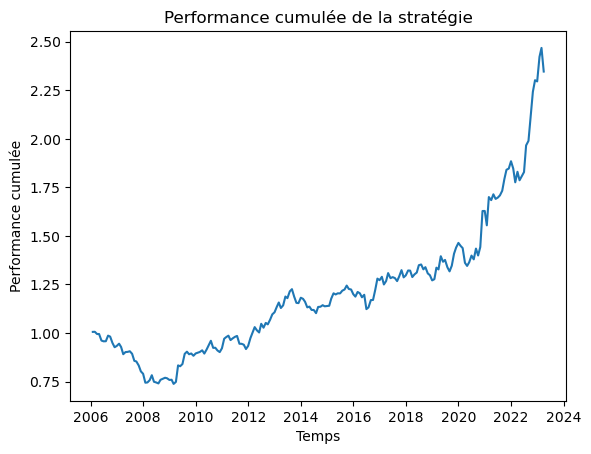

In [402]:
performance_cumulee = (1 + performance_strategie).cumprod()
plt.plot(performance_cumulee)
plt.title("Performance cumulée de la stratégie")
plt.xlabel("Temps")
plt.ylabel("Performance cumulée")
plt.show()